<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/Titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.5MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.17MB/s]


In [ ]:
train = pd.read_csv('/content/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# combine 리스트안에 둘을 담는다. 
# test도 가공된 형태로 들어가야 하기때문에 같이 바꿔주는 것이 좋다.
combine = [train, test] 

In [ ]:
train.Survived.value_counts() # 이 값을 예측해야한다.

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 확인

In [ ]:
train.isnull().sum() # Age, Embarked가 결측치가 있다. 적절하게 넣어줄 필요가 있다. cabin은 결측치가너무많아서 사용하지 않겠다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age채우기

In [ ]:
train.Name[:10] # 이름을 보니 가운데 Mr, Miss같은 경어가 있다.

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
for com in combine:
  com['Initial']=0
  for i in com:
      com['Initial']=com.Name.str.extract('([A-Za-z]+)\.') #정규표현식으로 .으로 끝나는 문자를 가져온다


In [ ]:
train['Initial'], test['Initial']

(0        Mr
 1       Mrs
 2      Miss
 3       Mrs
 4        Mr
        ... 
 886     Rev
 887    Miss
 888    Miss
 889      Mr
 890      Mr
 Name: Initial, Length: 891, dtype: object, 0          Mr
 1         Mrs
 2          Mr
 3          Mr
 4         Mrs
         ...  
 413        Mr
 414      Dona
 415        Mr
 416        Mr
 417    Master
 Name: Initial, Length: 418, dtype: object)

In [ ]:
pd.crosstab(train.Sex, train.Initial) # crosstap으로 sex와 Initial을 보면 남여를 지칭하는 말이 정말 많다.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
print(train.Initial.unique())
print(test.Initial.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [ ]:
# 이러한 값들은 하나씩 검색해 찾아보며 비슷한 의미를 같는 경어로 바꾸어준다.
for com in combine:
  com['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                          ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [ ]:
# Initial을 그룹으로 묶어서 나이의 평균을 보겠다.
# 이 값들로 결측치를 채워주겠다.
Ages = []
for com in combine:
  Ages.append(com.groupby('Initial')['Age'].mean()) # pd.core.scoeries 형태로 저장된다
Ages

[Initial
 Master     4.574167
 Miss      21.860000
 Mr        32.739609
 Mrs       35.981818
 Other     45.888889
 Name: Age, dtype: float64, Initial
 Master     7.406471
 Miss      21.774844
 Mr        32.151351
 Mrs       38.903226
 Other     42.750000
 Name: Age, dtype: float64]

In [ ]:
Ages[0][4]

45.888888888888886

In [ ]:
for i in range(2):
  combine[i].loc[(combine[i]['Age'].isnull()) & (combine[i]['Initial'] == 'Master'), 'Age'] = Ages[i][0]
  combine[i].loc[(combine[i]['Age'].isnull()) & (combine[i]['Initial'] == 'Miss'), 'Age'] = Ages[i][1]
  combine[i].loc[(combine[i]['Age'].isnull()) & (combine[i]['Initial'] == 'Mr'), 'Age'] = Ages[i][2]
  combine[i].loc[(combine[i]['Age'].isnull()) & (combine[i]['Initial'] == 'Mrs'), 'Age'] = Ages[i][3]
  combine[i].loc[(combine[i]['Age'].isnull()) & (combine[i]['Initial'] == 'Other'), 'Age'] = Ages[i][4]

In [ ]:
train.isnull().sum(), test.isnull().sum() # Age의 결측치가 없어졌다.

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 Initial          0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 Initial          0
 dtype: int64)

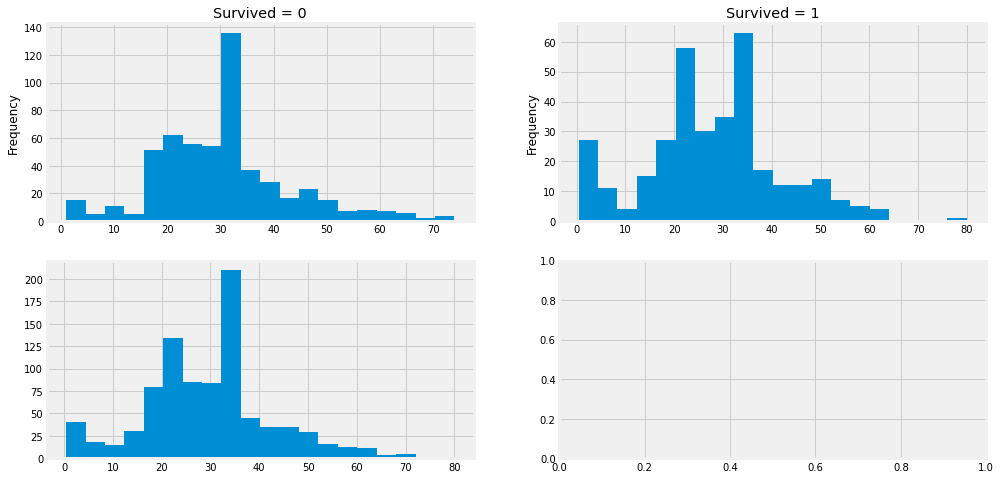

In [ ]:
# 생존여부에 따른 나이
# 20 초반과 30초반이 많이 살아남았다.
# 나이대 별로 비율로 확인해 볼 필요가있다.
#sns.displot(data=train, x='Age', hue='Survived' )
f,ax = plt.subplots(nrows=2, ncols=2  , figsize=(15,8))
train[train['Survived'] == 0].Age.plot.hist(ax=ax[0][0], bins=20)
ax[0][0].set_title('Survived = 0')

train[train['Survived'] == 1].Age.plot.hist(ax=ax[0][1], bins=20)
ax[0][1].set_title('Survived = 1')

train.Age.hist(ax=ax[1][0], bins=20) # 

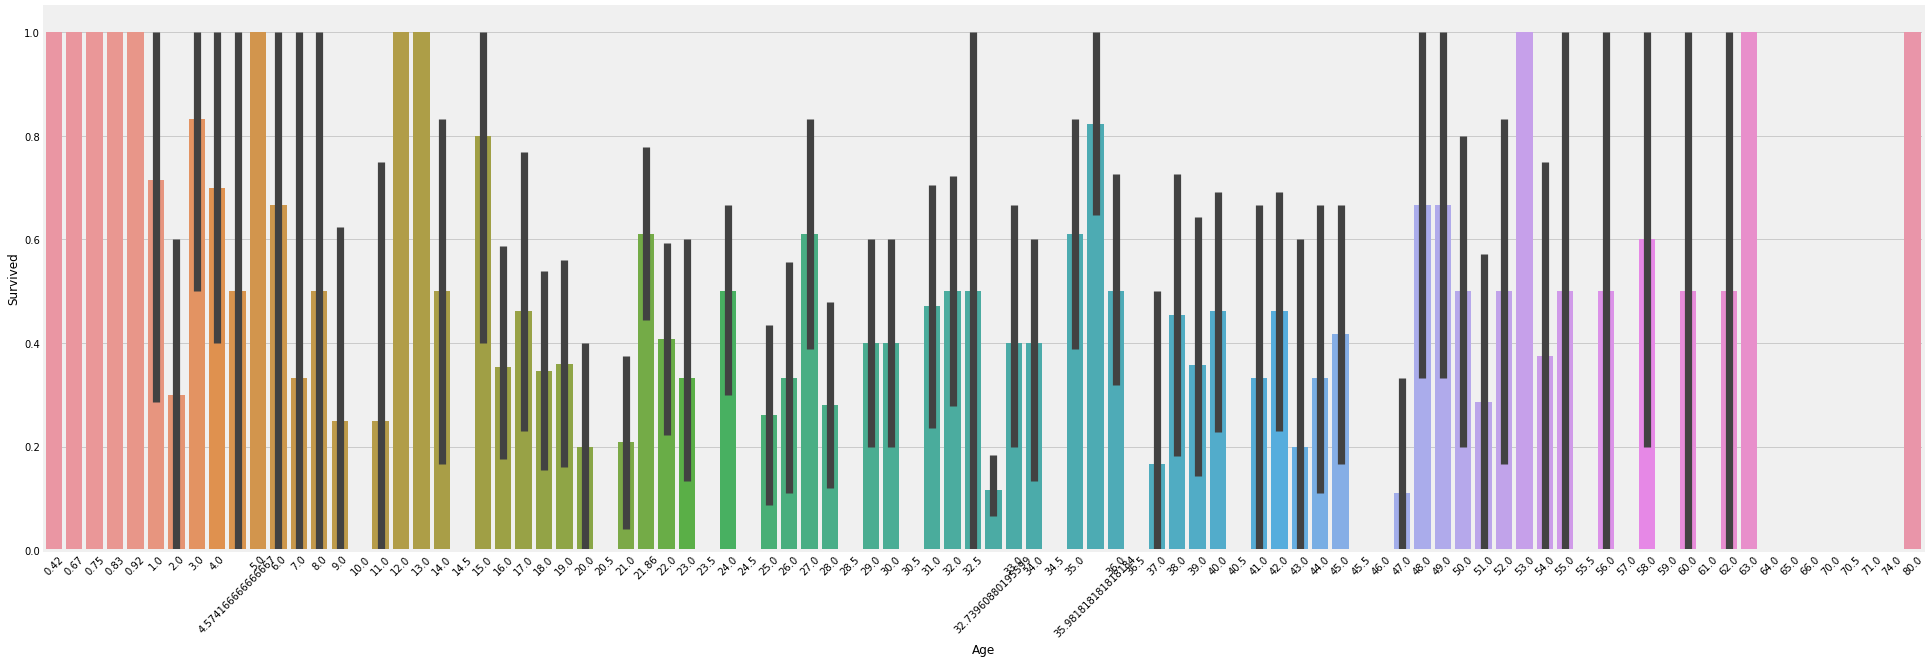

In [ ]:
# 어릴수록 생존률이 높은지는 아직 보류이다.
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45) # 겹치니깐 회전
sns.barplot(data=train, x='Age', y='Survived')

### Embarked 채우기

In [ ]:
train.Embarked.unique() # 3개의 항구와 결측치가있다. test엔 없다

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train[train['Embarked'].isnull()] # 결측치는 2개뿐이고 차이가 나이 뿐이다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


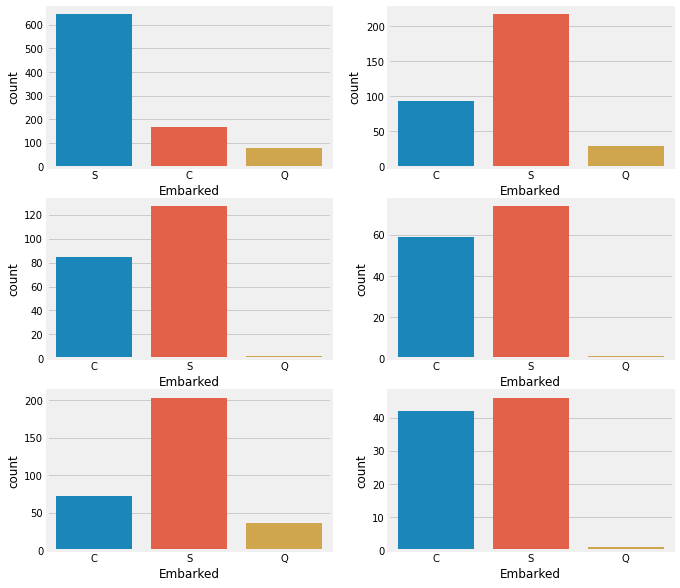

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
sns.countplot(data=train, x='Embarked', ax=ax[0][0]) # Embarked 횟수

sns.countplot(data=train[train['Survived'] == 1], x='Embarked', ax = ax[0][1]) # 살아남은 사람중 Embarked횟수

sns.countplot(data=train[train['Pclass'] == 1], x='Embarked', ax = ax[1][0]) # Pclass가 1인 사람중 Embarked 횟수

sns.countplot(data=train.loc[(train['Survived'] == 1) & (train['Pclass'] == 1)], x='Embarked', ax = ax[1][1]) # Pclass가 1이고 살아남은 사람중 Embarked 횟수

sns.countplot(data=train[train['Sex'] == 'female'], x='Embarked', ax = ax[2][0]) # 항구별 여성승객이 탄 횟수

sns.countplot(data=train.loc[(train['Survived'] == 1) & (train['Pclass'] == 1) & (train['Sex'] == 'female')], x='Embarked', ax = ax[2][1])

# pclass가 1이고 여성이고, 살아남았다는것을 보면 항구를 S로 보는게 좋을 것 같다.

In [ ]:
# S 로 결측치 채워준다
train.loc[train['Embarked'].isnull(),'Embarked'] = 'S' # loc으로 접근해야 반영된다.
# train.Embarked.fillna('S', inplace = True)

In [ ]:
train.isnull().sum() # 결측치가 없는것을 확인 할 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### Fare

In [ ]:
test[test.Fare.isnull() == True] # test에 NaN인 Fare이 하나있다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [ ]:
test.loc[(test['Pclass'] == 3) & (test.Sex == 'male') & (test.Embarked == 'S') & ((test.Age >= 40) & (test.Age <= 70)), 'Fare'].mean()

20.60555

In [ ]:
test.loc[test.Fare.isnull() == True, 'Fare'] = 20.6 # 조건에 얼추맞는 값으로 채워줌

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Initial          0
dtype: int64

## 상관관계 분석

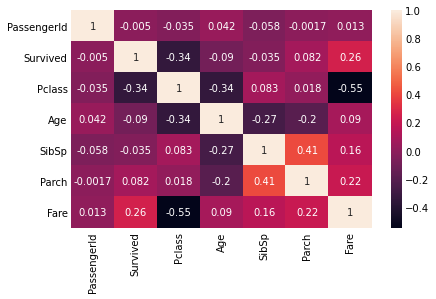

In [ ]:
# 상관분석(corr)를 heatmap으로 그려보면 Survived는 Fare과 양의 상관관계, Pclass와 음의 상관관계에 있다.
sns.heatmap(train.corr(), annot=True)

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

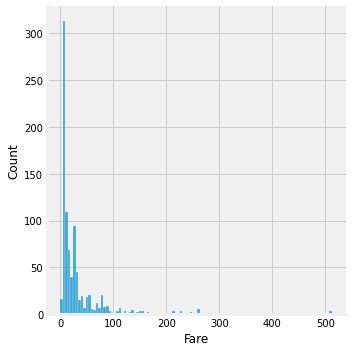

In [ ]:
sns.displot(train.Fare)

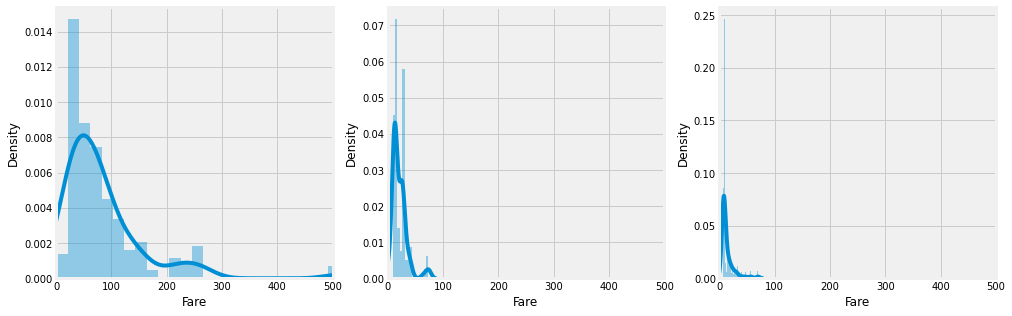

In [ ]:
# 요금을 보면 Pclass등급이 높을 수록(숫자가 낮을수록) 요금이 비싸다
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i in range(3):
  ax[i].set_xlim([0,500]) # 가로 길이
  sns.distplot(train[train['Pclass'] == i+1].Fare, ax=ax[i])

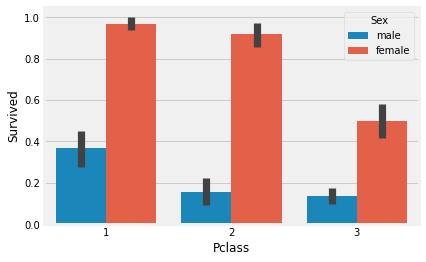

In [ ]:
sns.barplot(data = train, x='Pclass',y='Survived', hue='Sex') # 여성의 생존율이 높다.

## EDA정리   
Survived와 Fare는 양의 상관관계     
Survived와 Pclass는 음의 상관관계     
여성의 생존율이 더 높다    
Age에 관해선 더 볼 필요가 있다.

Age의 연속적인 값은 모델예측에 장애가 될 수 있다.     
묶어서 범주화 시키는게 모델이 도움이 될 수 있다.

In [ ]:
for com in combine:
  com['Age_band']=0
  com.loc[com['Age']<=16,'Age_band']=0
  com.loc[(com['Age']>16)&(com['Age']<=32),'Age_band']=1
  com.loc[(com['Age']>32)&(com['Age']<=48),'Age_band']=2
  com.loc[(com['Age']>48)&(com['Age']<=64),'Age_band']=3
  com.loc[com['Age']>64,'Age_band']=4
train.Age_band.head(), test.Age_band.head()

(0    1
 1    2
 2    1
 3    2
 4    2
 Name: Age_band, dtype: int64, 0    2
 1    2
 2    3
 3    1
 4    1
 Name: Age_band, dtype: int64)

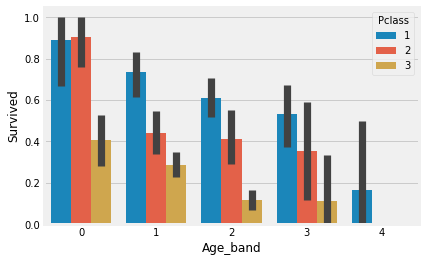

In [ ]:
sns.barplot(data = train, x='Age_band', y='Survived',hue='Pclass')# 나이가 어릴수록 생존률이 높아지는 경향이 보인다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Initial      891 non-null    int64  
 13  Age_band     891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [ ]:
# 사용해야할 feature중에서 object타입이 있다. 이를 수치형으로 바꾸어야한다.
o_col = [col for col in train.columns if train[col].dtype == 'object']
o_col # 이 중에서 Name, Ticket, Cabin값들은 버릴 것이다.

['Name', 'Ticket', 'Cabin']

In [ ]:
o_col.remove('Name')
o_col.remove('Ticket')
o_col.remove('Cabin')

In [ ]:
# LabelEncoder로 object타입이였던 데이터들을 숫자로 바꾸었다
from sklearn.preprocessing import LabelEncoder
for col in o_col:
  encoder = LabelEncoder()
  train[col] = encoder.fit_transform(train[col])
  test[col] = encoder.fit_transform(test[col])

In [ ]:
# 모두 수치형으로 바뀐 것을 확인 할 수 있다. Name, Ticket, cabin 제외
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Initial      891 non-null    int64  
 13  Age_band     891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------  

In [ ]:
# 사용하지 않을 데이터들을 지운다.
train.drop(['Name','Age','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
test.drop(['Name','Age','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

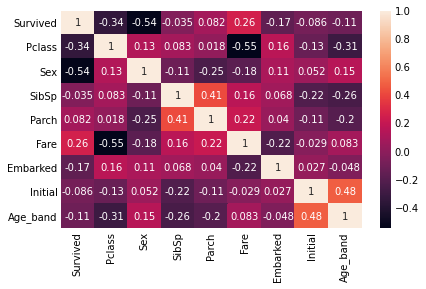

In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
X_feature = train.columns.tolist()
X_feature.remove('Survived')
X_feature

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial', 'Age_band']

In [ ]:
test.columns.tolist()

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial', 'Age_band']

## 학습

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression     
      
위 알고리즘들을 사용해 보겠다

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
# train_m, test_m 모두 train_X, train_Y , test_X, test_Y 를 나누기위해 만든 데이터(test_m은 검증용, test와는 다르다)
# stratifiy로 비율을 유지하면서 나눈다.
train_m,test_m=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
# train_X를 학습데이터로, train_Y를 학습데이터로 사용한다.
train_X=train_m[train_m.columns[1:]]
train_Y=train_m[train_m.columns[:1]]
# 검증데이터로 test_X, test_Y를 사용한다.
test_X=test_m[test_m.columns[1:]]
test_Y=test_m[test_m.columns[:1]]
# 전체 데이터도 X, Y로 나눈다.
X=train[train.columns[1:]]
Y=train['Survived']

In [ ]:
train_m.shape, test_m.shape, train_X.shape, train_Y.shape

((623, 9), (268, 9), (623, 8), (623, 1))

In [ ]:
X.shape, Y.shape

((891, 8), (891,))

파라미터는 거의 막판에 고치는데 감을 잡는게 중요하다     
때문에 실력을 키우려면 그리드나 랜덤서치로 찾는것보다 하나하나 해보는 것이 중요

Radial Support Vector Machines(rbf-SVM)

In [ ]:
# probability를 True로 해야 predict_proba(정답이라고 예측하는 확률값)을 볼수 있다
model=svm.SVC(kernel='rbf',C=1,gamma=0.1, probability= True)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7910447761194029


In [ ]:
model.predict_proba(test_X)[:10]

array([[0.83343484, 0.16656516],
       [0.4736907 , 0.5263093 ],
       [0.85303473, 0.14696527],
       [0.28900826, 0.71099174],
       [0.82549592, 0.17450408],
       [0.20701469, 0.79298531],
       [0.85070793, 0.14929207],
       [0.84831926, 0.15168074],
       [0.60936825, 0.39063175],
       [0.65530629, 0.34469371]])

In [ ]:
# 임계값에 따라 정확도가 달라진다.
score = []
for i_thres in np.arange(0, 1, 0.01):
  threshold = i_thres
  prediction1=(model.predict_proba(test_X)[:,1] > threshold).astype(int) 
  score.append(metrics.accuracy_score(test_Y, prediction1))

score

[0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3805970149253731,
 0.3805970149253731,
 0.3843283582089552,
 0.3917910447761194,
 0.41044776119402987,
 0.503731343283582,
 0.6977611940298507,
 0.7201492537313433,
 0.75,
 0.753731343283582,
 0.7574626865671642,
 0.7611940298507462,
 0.7574626865671642,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7574626865671642,
 0.753731343283582,
 0.753731343283582,
 0.7574626865671642,
 0.7649253731343284,
 0.7649253731343284,
 0.7686567164179104,
 0.7649253731343284,
 0.7686567164179104,
 0.7686567164179104,
 0.7761194029850746,
 0.7761194029850746,
 0.7723880597014925,
 0.7798507462686567,
 0.7798507462686567,
 0.7835820895522388,
 0.7873134328358209,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7947761194029851,
 0.7947761194029851,
 0.7947761194029851,
 0.7947761194029

best threshold: 0.52


Text(0, 0.5, 'accuracy score')

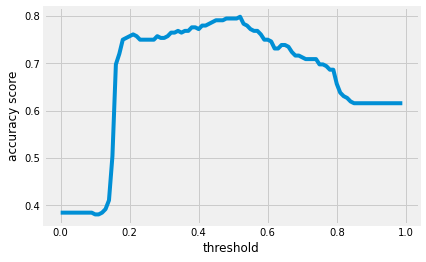

In [ ]:
print('best threshold:' , np.argmax(score)/100)
plt.plot(np.arange(0,1,0.01), score)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1, probability=True)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7910447761194029


In [ ]:
# 임계값에 따라 정확도가 달라진다.
score = []
for i_thres in np.arange(0, 1, 0.01):
  threshold = i_thres
  prediction2=(model.predict_proba(test_X)[:,1] > threshold).astype(int) 
  score.append(metrics.accuracy_score(test_Y, prediction2))
  
print('best threshold:' , np.argmax(score)/100)
score

best threshold: 0.2


[0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.3843283582089552,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761

best threshold: 0.2


Text(0, 0.5, 'accuracy score')

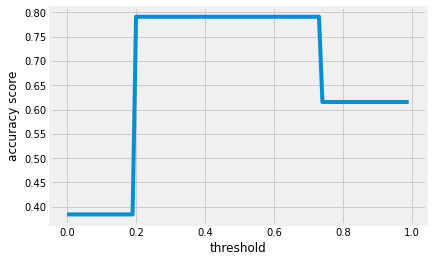

In [ ]:
print('best threshold:' , np.argmax(score)/100)
plt.plot(np.arange(0,1,0.01), score)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [ ]:
# 임계값에 따라 정확도가 달라진다.
score = []
for i_thres in np.arange(0, 1, 0.01):
  threshold = i_thres
  prediction3=(model.predict_proba(test_X)[:,1] > threshold).astype(int) 
  score.append(metrics.accuracy_score(test_Y, prediction3))
  
print('best threshold:' , np.argmax(score)/100)
score

best threshold: 0.51


[0.3843283582089552,
 0.3880597014925373,
 0.3880597014925373,
 0.3880597014925373,
 0.39552238805970147,
 0.41044776119402987,
 0.4216417910447761,
 0.43283582089552236,
 0.5298507462686567,
 0.5671641791044776,
 0.5895522388059702,
 0.6044776119402985,
 0.6716417910447762,
 0.6865671641791045,
 0.6940298507462687,
 0.7014925373134329,
 0.7089552238805971,
 0.7164179104477612,
 0.7201492537313433,
 0.7313432835820896,
 0.7313432835820896,
 0.7388059701492538,
 0.7388059701492538,
 0.7350746268656716,
 0.7350746268656716,
 0.7388059701492538,
 0.7388059701492538,
 0.7388059701492538,
 0.7723880597014925,
 0.7761194029850746,
 0.7723880597014925,
 0.7761194029850746,
 0.7761194029850746,
 0.7835820895522388,
 0.7835820895522388,
 0.7835820895522388,
 0.7873134328358209,
 0.7873134328358209,
 0.7947761194029851,
 0.7947761194029851,
 0.7947761194029851,
 0.8022388059701493,
 0.8022388059701493,
 0.8097014925373134,
 0.8097014925373134,
 0.8097014925373134,
 0.8134328358208955,
 0.8097014

best threshold: 0.51


Text(0, 0.5, 'accuracy_score')

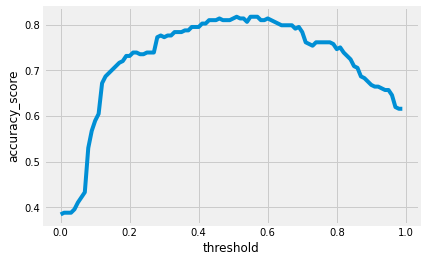

In [ ]:
print('best threshold:' , np.argmax(score)/100)
plt.plot(np.arange(0,1,0.01), score)
plt.xlabel('threshold')
plt.ylabel('accuracy_score')

Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.7723880597014925


In [ ]:
# 임계값에 따라 정확도가 달라진다.
score = []
for i_thres in np.arange(0, 1, 0.01):
  threshold = i_thres
  prediction4=(model.predict_proba(test_X)[:,1] > threshold).astype(int) 
  score.append(metrics.accuracy_score(test_Y, prediction4))
  
print('best threshold:' , np.argmax(score)/100)
score

best threshold: 0.5


[0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6716417910447762,
 0.6977611940298507,
 0.6977611940298507,
 0.7014925373134329,
 0.7014925373134329,
 0.7014925373134329,
 0.7014925373134329,
 0.7014925373134329,
 0.7313432835820896,
 0.7313432835820896,
 0.7313432835820896,
 0.7313432835820896,
 0.7313432835820896,
 0.7574626865671642,
 0.7574626865671642,
 0.7574626865671642,
 0.7574626865671642,
 0.7574626865671642,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731343284,
 0.7649253731

best threshold: 0.5


Text(0, 0.5, 'accuracy_score')

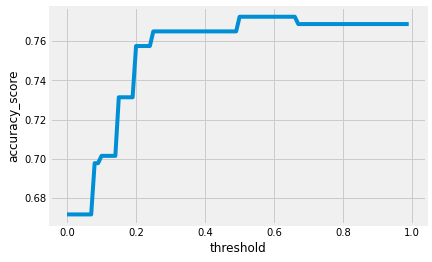

In [ ]:
print('best threshold:' , np.argmax(score)/100)
plt.plot(np.arange(0,1,0.01), score)
plt.xlabel('threshold')
plt.ylabel('accuracy_score')

K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.753731343283582


In [ ]:
# 임계값에 따라 정확도가 달라진다.
score = []
for i_thres in np.arange(0, 1, 0.01):
  threshold = i_thres
  prediction5=(model.predict_proba(test_X)[:,1] > threshold).astype(int) 
  score.append(metrics.accuracy_score(test_Y, prediction5))
  
print('best threshold:' , np.argmax(score)/100)
score

best threshold: 0.4


[0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.5671641791044776,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.7201492537313433,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,
 0.753731343283582,


best threshold: 0.4


Text(0, 0.5, 'accuracy_score')

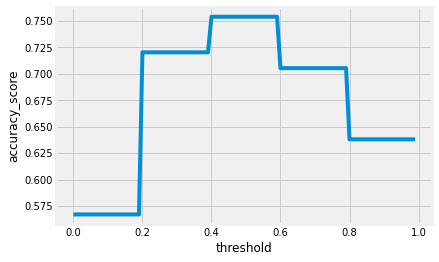

In [ ]:
print('best threshold:' , np.argmax(score)/100)
plt.plot(np.arange(0,1,0.01), score)
plt.xlabel('threshold')
plt.ylabel('accuracy_score')

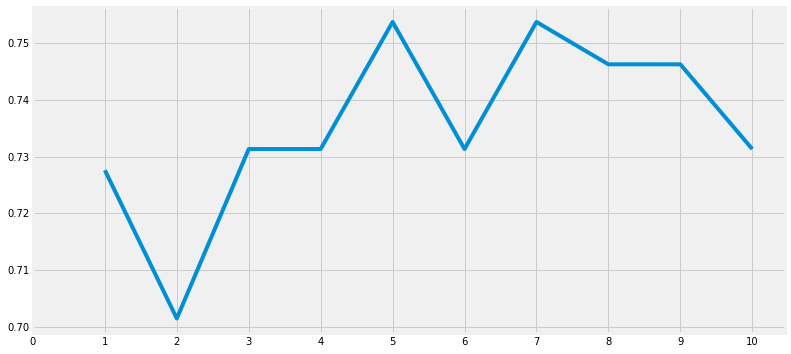

Accuracies for different values of n are: [0.72761194 0.70149254 0.73134328 0.73134328 0.75373134 0.73134328
 0.75373134 0.74626866 0.74626866 0.73134328] with the max value as  0.753731343283582


In [ ]:
# knn은 이웃하는 neighbors의 따라 정확도가 달라진다.

a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) # default 5
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8171641791044776


Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7947761194029851


그래프들을 보면 임계값에 따라 정확도가 달라진다.     
임계값 말고도 모델에 영향을 주는 하이퍼파라미터들을 하나하나 수정해가면서    
정확도나 score를 올려간다.

## Cross validation

데이터들은 빈번하게 불균형합니다.     
즉, class1 인스턴스의 수가 많지만 다른 클래스 인스턴스의 수가 적을 수 있습니다.     
 따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고      테스트해야합니다.          
 그런 다음 데이터 세트에 대해 기록 된 모든 정확도의 평균을 구할 수 있습니다.

1) K-Fold Cross Validation은 먼저 데이터 세트를 k-subset으로 나누는 방식으로 작동합니다.

2) 데이터 세트를 (k = 5) 부분으로 나눈다 고 가정 해 보겠습니다. 테스트를 위해 1 개 부분을 예약하고 4 개 부분에 대해 알고리즘을 훈련합니다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 교육하여 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-Fold Cross Validation이라고합니다.

4) 알고리즘은 일부 훈련 데이터의 경우 데이터 세트에 대해 과소 적합 할 수 있으며 때로는 다른 훈련 세트의 데이터를 과적 합할 수도 있습니다. 따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, 10개의 샘플을 만들겠다. 9개는 학습, 1개는 검증에 사용한다.
xyz=[] # cv평균을 담는다.
accuracy=[] # 정확도
std=[] # 표준편차
# 사용할 모델의 이름
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
# 정의한 모델들을 리스트에 넣는다. 
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.786729,0.039372
Radial Svm,0.673508,0.041973
Logistic Regression,0.795768,0.020822
KNN,0.761024,0.040515
Decision Tree,0.799114,0.031476
Naive Bayes,0.801361,0.025521
Random Forest,0.806929,0.032634


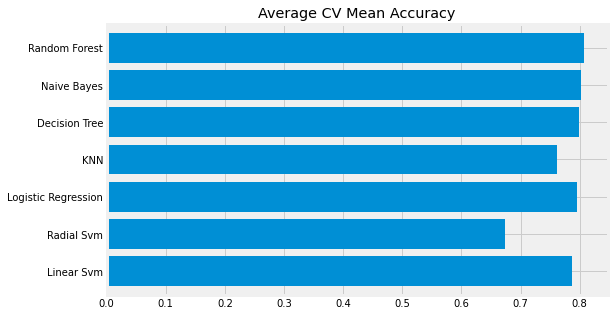

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

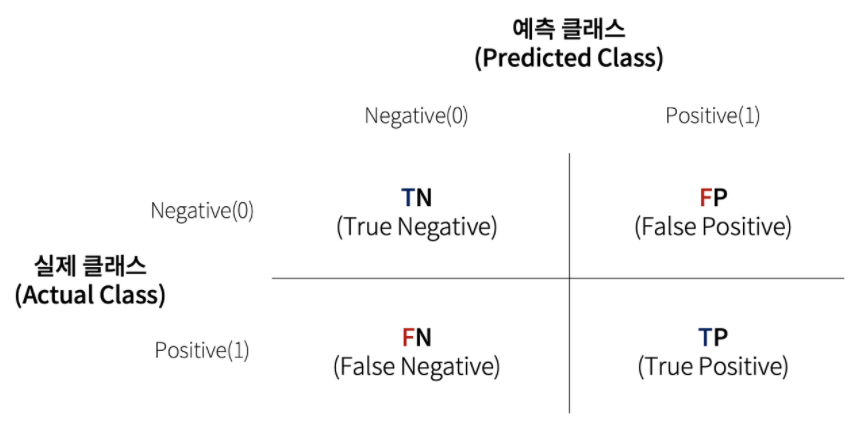

정확도 : (TN + TP) / (TN + FP + FN + TP)     
정밀도(Precision) : TP / (TP + FP) 정답이라고 예측한 값중 정답비율     
재현율(Recall_score) : TP / (TP + FN) 실제양성값중 모델이 맞춘 정답비율

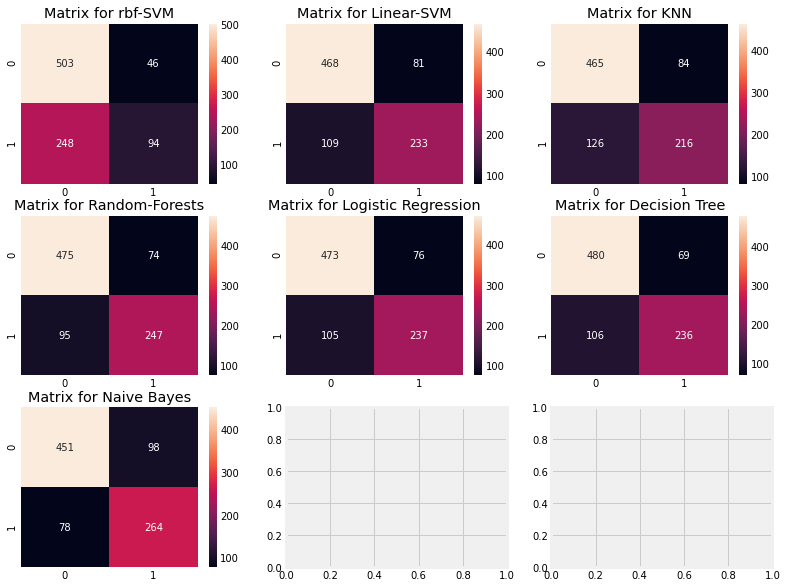

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

heatmap을 보면 Naive Bayes가 성능이 좋아보인다.

## 하이퍼파라미터 튜닝

방법      
  1. Manual tuning - 하나하나 손으로 해보는 것이다     
  2. GridSearch - 파라미터를 지정한 값들로 변경하면서 가장좋은 파라미터 찾는다    
  3. Randomized Search - 파라미터를 랜덤하게(범위를 지정해줌) 주어서 가장좋은 파라미터를 찾는다       
  4. Baysian optimization -       

manual tuning으로 감을 잡는게 좋다지만 보통 Randomized를 많이 쓴다.

gridsearch


In [ ]:
# GridSearchCV로 SVC의 파라미터를 조정해보겠다. 
# C(7) * gamma(6) * kernel(2) => 84 를 cv로 5번 함으로 420번의 fit을 한다.
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.3,0.5,0.7,0.9,1]
gamma=[0.1,0.3,0.5,0.7,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
# 가장 좋은 점수
print(gd.best_score_)
# 가장 좋은 모델 , 변수로 담아서 다시사용도 가능하다.
print(gd.best_estimator_)

SVC는 C = 0.3,  gamma = 0.1,  kernel = 'linear' 일때 가장좋은 모델이된다    
다른 파라미터에 따라서 달라질 수도 있다.

In [ ]:
# gridsearch로 RandomForest의 파라미터를 조정해보겠다.
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   38.1s finished


0.8069361621994853
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


RandomForest 는 n_estimators가 600일때 가장 좋았다.

## Ensembling


Ensembling은 모델의 정확성이나 성능을 높이는 좋은 방법.      
하나의 강력한 모델을 만들기 위해 다양한 단순 모델의 조합    

1)Voting Classifier

2)Bagging

3)Boosting.

Voting Classifier


> 모든 하위 모델의 예측을 기반으로 평균 예측을 한다      
서로 다른 알고리즘 model을 조합해서 사용

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
# Hard vote : 결과물에 대한 최종 값을 투표하여 결정
# Soft vote : 결과물이 나올 확률값을 다 더해서 각각의 확률을 구한 뒤 최종값 도출, 보통 soft가 합리적
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8192883895131086


Bagging


> 중첩을 허용한 sampling을 통해 다시 여러개의 세트로 분할하는 방식      
평균화로 인해 분산이 감소     
model 학습 오류의 3가지 주요 원인을(분산, 편향, 노이즈) 완화시켜준다      
같은 알고리즘 내에서 Sample을 조합하여 사용



In [ ]:
# bagged KNN
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean()) 

The accuracy for bagged KNN is: 0.753731343283582
The cross validated score for bagged KNN is: 0.7654431960049937


In [ ]:
# bagged DecisionTree  => RandomForest
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8134328358208955
The cross validated score for bagged Decision Tree is: 0.8069912609238452


Boosting


> 분류기를 순차적으로 학습시킨다.     
앞의 분류기가 잘못예측한 인스턴스에 가중치를 부여해서 다음 샘플링에 반영        
잘못된 인스턴스를 올바르게 예측하려고 시도      



In [ ]:
# AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8238077403245943


In [ ]:
# XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8294382022471909


XGBoost가 성능이 더 좋으니 최적의 파라미터를 찾도록 GridSearch를 해본다

In [ ]:
import xgboost as xg
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
model = gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8384031134266525
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.9min finished


가장좋은 파라미터는 nestimators = 500, learning_rate=0.1일때이다     
이 파라미터를 갖는 XGBoost를 cross_validation해보겠다

[0.81111111 0.82022472 0.74157303 0.85393258 0.8988764  0.84269663
 0.84269663 0.78651685 0.86516854 0.84269663]
0.8305493133583021


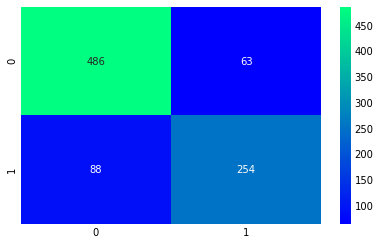

In [ ]:
import xgboost as xg
xgb=xg.XGBClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_predict(xgb,X,Y,cv=10)
print(cross_val_score(xgb,X,Y, cv=10))
print(cross_val_score(xgb,X,Y, cv=10).mean())
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [ ]:
test_y_pred = model.predict(test)

In [ ]:
passengerId = pd.read_csv('/content/test.csv')
passengerId

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
submission = pd.DataFrame({
        "PassengerId": passengerId["PassengerId"],
        "Survived": test_y_pred
    })

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('/content/submission.csv', index=False)

## Feature Importance

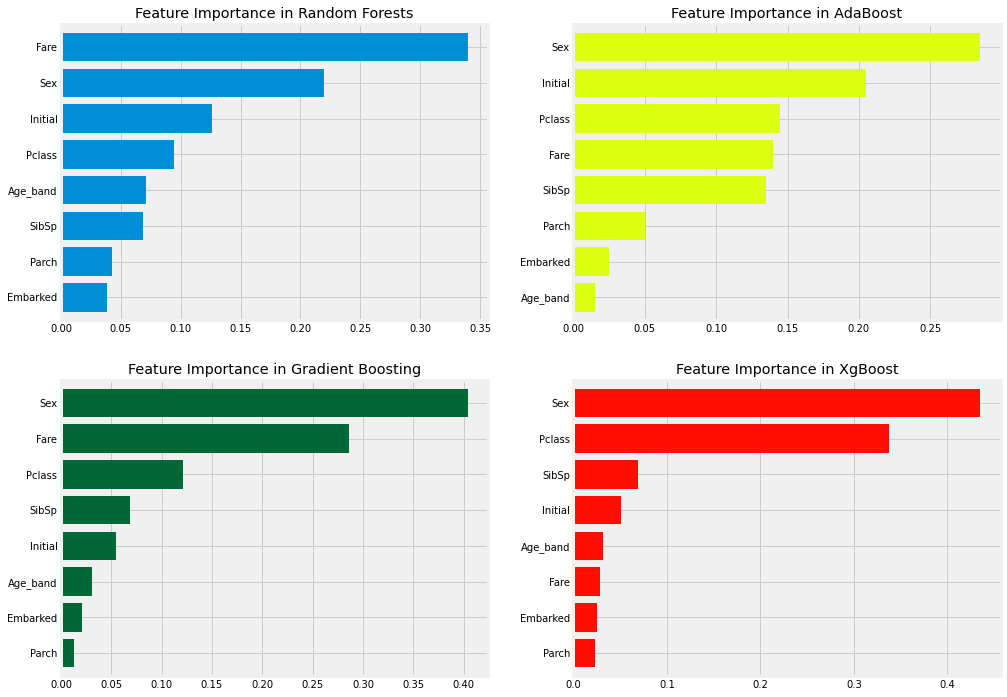

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
import xgboost as xg
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

모델마다 중요하게여기는 feature들의 순서가 다르다     
보통 랜덤포레스트로 feature_importanse를 본다.